In [1]:
using Images, Colors, Lazy, StaticArrays;

function LAB➜RGB(color)
    convert(RGB{Float64}, Lab(color...))::RGB{Float64}
end


function createImage(shader::Function, w=400, h=400)
    img = Array{RGB{Float64}, 2}(undef, h, w)
	@Threads.threads for j=h:-1:1
		for i=1:w
			img[h-j+1,i] = LAB➜RGB(shader(i,j,w,h))
		end
	end
	img
end
nothing

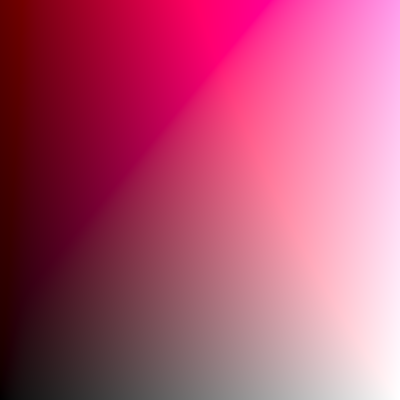

In [2]:
function sweep(hue) 
    hr = deg2rad(hue) 
    c  = cos(hr)
    s  = sin(hr)
    (i,j,w,h) -> [100*i/w, 100*j/h*c, 100*j/h*s]
end
    
f = createImage(sweep(7)) 

In [5]:
using jl420

In [7]:
jl420.data_url(f)

"" ⋯ 103968 bytes ⋯ "ePCNGjBg5S4wY+ZRnxIhRnhEjRnlGjJwlRoycESNniZGzxIg5MWJOjJgTI4bEyFli5CwxJ0bOEiNnxJAYOSOGxMgZOUvMiZEzcpaYE/MUI2fJWWJIzIl5ipEzckbOkrPkLDlLzpKz5Cw5S86Ss+QsOUvOkjNy5sQ8xZyYk7PkLDlzYp5iTs6SszwxTzEkZ8mZE3Nylpx5iiE5yxNzcpYn5ilnyZmnnOWJecpZnpiTszwxJGeecv4FNKiYCKZG4TkAAAAASUVORK5C"